E1. Analiza dynamiki wybranej giełdy za pomocą  wybranej techniki teorii grafów 

**Research question: What are correlations between constituents?**

Celem tego ćwiczenia jest zbadanie dynamiki wybranej giełdy w okresie narastania wybranej bańki giełdowej oraz  jej pęknięcia, z wykorzystaniem teorii grafów. Realizacja ćwiczenia składa się  z następujących etapów:  

1.  wybór  giełdy  i  ściągnięcie  odpowiednich  empirycznych  danych  giełdowych  z  wybranej  strony internetowej lub uzyskanie ich bezpośrednio z danej giełdy,  
    1. Download FTSE100 historical data from yahoo, transform it into a dataframe and save to a file.
    2. Download FTSE250 historical data from yahoo, transform it into a dataframe and save to a file.
    3. Plot number of constituents(time) for FTSE100
    4. Plot number of constituents(time) for FTSE250
2.  dobór odpowiedniego modelu sieci oraz algorytmu generującego,  
3.  dobór właściwych przedziałów średniowania,  
4.  dyskusja  uzyskanych  wyników  a  w tym  zwłaszcza  ewentualnych  strukturalnych  topologicznych) przemian fazowych prowadzących do analizy kryzysu i krachu. 

### Questions
    Should I use log transformation?
    How should I calculate <Si> How many days average. (See exercise notes 1.2)
    How to calculate distances between companies? How to interpret them?

[Exercise materials](https://drive.google.com/open?id=0ByG3ASYoU228cnFHaEZDR0tQcWlaZlNGa2xoUEhNSUJfMDg4)

### Notes(Exercise materials)
    1.1 Diferences a couple orders of magnitude
    1.2 <Si> - average over for example 50 days.



In [18]:
import urllib,time,datetime
import pandas.io.data as web
import pandas as pd
import numpy as np
import pylab as py

%matplotlib inline

1. 
    A. Below I download FTSE100 historical data from yahoo and save it to data_FTSE100.txt

In [19]:
start = datetime.datetime(1985, 1, 1)
end = datetime.datetime(2015, 4, 29)

In [30]:
with open('./constituents_FTSE100') as f:
    lines = f.readlines()

In [31]:
#fig = py.figure()
f=web.DataReader(lines[0].strip(), 'yahoo', start, end)

lines = lines[0:100]
y=[]

for line in lines:
    if len(line.strip())>1:
        try:
            f=web.DataReader(line.strip(), 'yahoo', start, end)
        except:
            raise
        else:
            y.append( f['Open'] )            
            #print( f )
#print ( y[0]['Open'] )
#print ( y[1] )
#print ( "And so on ..." )

# = y[0]['Open'] 

Stock_values_dataframe = pd.concat( y, axis=1 )

Stock_values_dataframe.columns = [ line.replace( "\n", "" ) for line in lines ]

#print( Stock_values_dataframe )


Stock_values_dataframe.to_csv( "./data_FTSE100.txt" )

#file = open( "./data_FTSE100.txt", "w" )
#for i in y:
#    file.write( str( i ) ) 
#file.close()

In [33]:
Stock_values_dataframe = pd.read_csv( "./data_FTSE100.txt" )

print( Stock_values_dataframe )
print( len( lines ) )
#print( lines[] )

            Date   AAL.L    ABF.L  ADM.L  ADN.L  AGK.L     AHT.L   ANTO.L  \
0     1988-05-03     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
1     1988-05-04     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
2     1988-05-05     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
3     1988-05-06     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
4     1988-05-09     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
5     1988-05-10     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
6     1988-05-11     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
7     1988-05-12     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
8     1988-05-13     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
9     1988-05-16     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
10    1988-05-17     NaN      NaN    NaN    NaN    NaN       NaN      NaN   
11    1988-05-18     NaN      NaN    NaN    NaN    NaN       NaN      NaN   

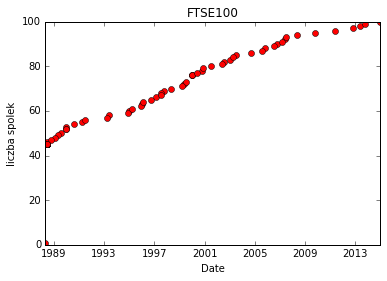

In [14]:
py.xlabel('Date')
py.ylabel('liczba spolek')
py.title('FTSE100')

x=[]

for i in y:
    j=0
    for k in y:
        if k<=i:
            j+=1
    x.append(j)

py.plot(y,x, 'ro')
py.show()
#fig.savefig('/home/pawel/Documents/magisterka/Financial_historical_data/constituents100.jpg')
py.clf()

1. 
    B. Below I download FTSE250 historical data from yahoo

In [17]:
with open('./constituents_FTSE250') as f:
    lines = f.readlines()
    
for line in lines:
    if len(line.strip())>1:
        try:
            f=web.DataReader(line.strip(), 'yahoo', start, end)
        except:
            raise
        else:
            y.append(f.index.date[0])            
            #print f.index.date[0]

OSError: after 3 tries, Yahoo! did not return a 200 for url 'http://ichart.finance.yahoo.com/table.csv?s=BNKR.L&a=0&b=1&c=1985&d=3&e=29&f=2015&g=d&ignore=.csv'

In [ ]:
py.xlabel('Data wejscia')
py.ylabel('liczba spolek')
py.title('FTSE250')


for i in y:
    j=0
    for k in y:
        if k<=i:
            j+=1
    x.append(j)


py.plot(y,x, 'ro')
py.show()
#fig.savefig('/home/pawel/Documents/magisterka/Financial_historical_data/constituents250.jpg')
py.clf()